In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scienceplots
import matplotlib.animation as animation
from scipy.sparse import dok_matrix
import multiprocessing as mp
import scipy as sp
import matplotlib.ticker as ticker
import project

In [2]:
#General plot parameters and size definition
plt.style.use('science')
plt.rcParams["figure.figsize"] = (12,7)
plt.rcParams.update({"axes.grid" : True})
plt.rcParams.update({"axes.titlesize": 18})
plt.rcParams.update({"axes.labelsize": 15})

In [3]:
def spikelet_fun(strength):
    return strength*  6.26066980e+01 - 1.44182439e-02

In [4]:
#loading up the parameters

params_HH = project.utils.load_HH()
params_LIF = project.utils.load_LIF()
params_IZH = project.utils.load_ISH()
params_ML = project.utils.load_ML()

#time parameters
t_final = 1500
dt = 0.01



#Other constant parameters
num_neurons = 2
#Variation for the initial conditions
volt_var = np.random.normal(0,5,num_neurons)
rec_var = np.random.normal(0,1,num_neurons)
Isyn = np.array([[0,0.3],[0.3,0]])
tau = 0.65
V0 = -65 * np.ones(num_neurons) + volt_var
y0 = -65 * np.ones(num_neurons) + volt_var
w0 = 0 * np.ones(num_neurons) + rec_var
u0 = 0 * np.ones(num_neurons) + rec_var
n0 = 0 * np.ones(num_neurons) + rec_var
m0 = 0 * np.ones(num_neurons) + rec_var
h0 = 0 * np.ones(num_neurons) + rec_var
order = 2


#fixing random seed
np.random.seed(1234)

#generating the intensities
I_HH = np.zeros((int(t_final/dt),num_neurons))
I_IF = np.zeros((int(t_final/dt),num_neurons))
I_IZH = np.zeros((int(t_final/dt),num_neurons))
I_ML = np.zeros((int(t_final/dt),num_neurons))

for i in range(0,num_neurons):
    x_normal = np.random.normal(0,5,int(t_final/dt))
    x_if = np.random.normal(0,1.5,int(t_final/dt))
    I_HH[:,i] = 2.5 * (1 + 1*x_normal)
    I_IF[:,i] = 2.5 * (1 + 1*x_if)
    I_IZH[:,i] = 2.5 * (1 + 1*x_normal)
    I_ML[:,i] = 2.5 * (1+ 1*x_normal)
    #I_HH[:,i] = 2.5 
    #I_IF[:,i] = 2.5 
    #I_IZH[:,i] = 2.5
    #I_ML[:,i] = 2.5 

HH_gap_junction = np.zeros((int(t_final/dt),num_neurons))
HH_synaptic_current = np.zeros((int(t_final/dt),num_neurons))

IF_gap_junction = np.zeros((int(t_final/dt),num_neurons))
IF_synaptic_current = np.zeros((int(t_final/dt),num_neurons))

IZH_gap_junction = np.zeros((int(t_final/dt),num_neurons))
IZH_synaptic_current = np.zeros((int(t_final/dt),num_neurons))

ML_gap_junction = np.zeros((int(t_final/dt),num_neurons))
ML_synaptic_current = np.zeros((int(t_final/dt),num_neurons))

In [5]:
dataHH_adjust, completeHH_adjust, matrixHH_adjust = project.models.HH_Neuron_Pairs_test(dt,t_final,order,V0,n0,m0,h0,*params_HH,I_HH,Isyn,0.012,tau,HH_gap_junction,HH_synaptic_current)
dataIF_adjust, completeIF_adjust, matrixIF_adjust = project.models.LIF_Neuron_Pairs_tests(dt, t_final,order,y0,*params_LIF,I_IF,Isyn,0.0012,tau,spikelet_fun(0.012), IF_gap_junction, IF_synaptic_current)
dataIZH_adjust, completeIZH_adjust, matrixIZH_adjust = project.models.IZH_Neuron_Pairs_tests(dt,t_final,order,y0,u0,I_IZH,Isyn,*params_IZH,0.04,tau,IZH_gap_junction,IZH_synaptic_current)
dataML_adjust, completeML_adjust, matrixML_adjust = project.models.ML_Neuron_Pairs_tests(dt,t_final,2,y0,w0,*params_ML,I_ML,Isyn,0.008,tau, ML_gap_junction, ML_synaptic_current)

(-65.0, 25.0)

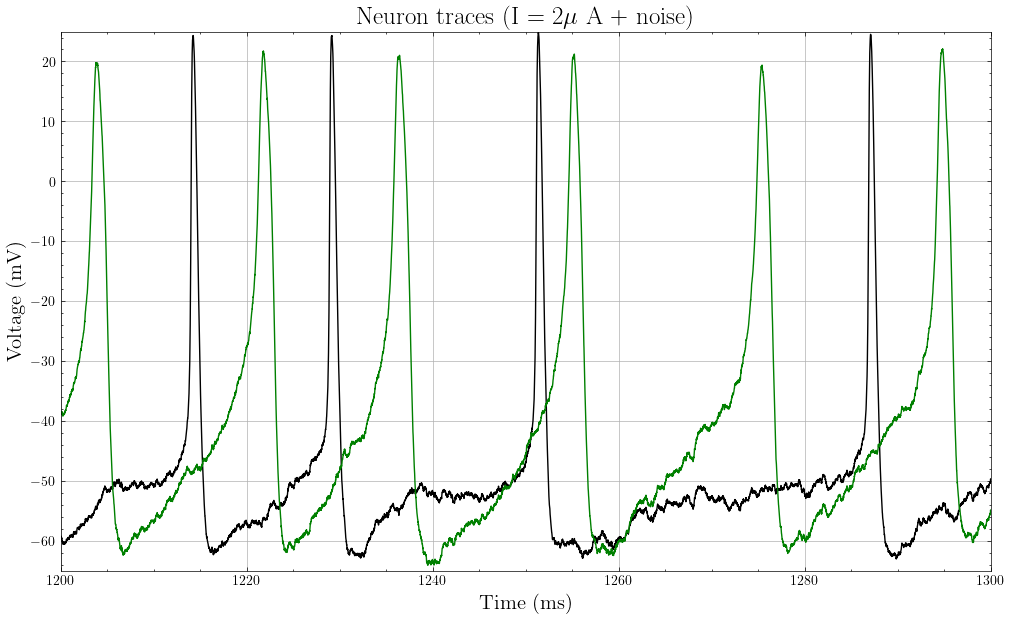

In [6]:
time = np.linspace(0,t_final,int(t_final/dt),)
plt.plot(time,dataHH_adjust[:,1], color = 'black')
plt.plot(time,dataML_adjust[:,1], color = 'green')
plt.title(r'Neuron traces (I = 2$\mu$ A + noise)')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.xlim(1200,1300)
plt.ylim(-65,25)

(0.0, 10000.0)

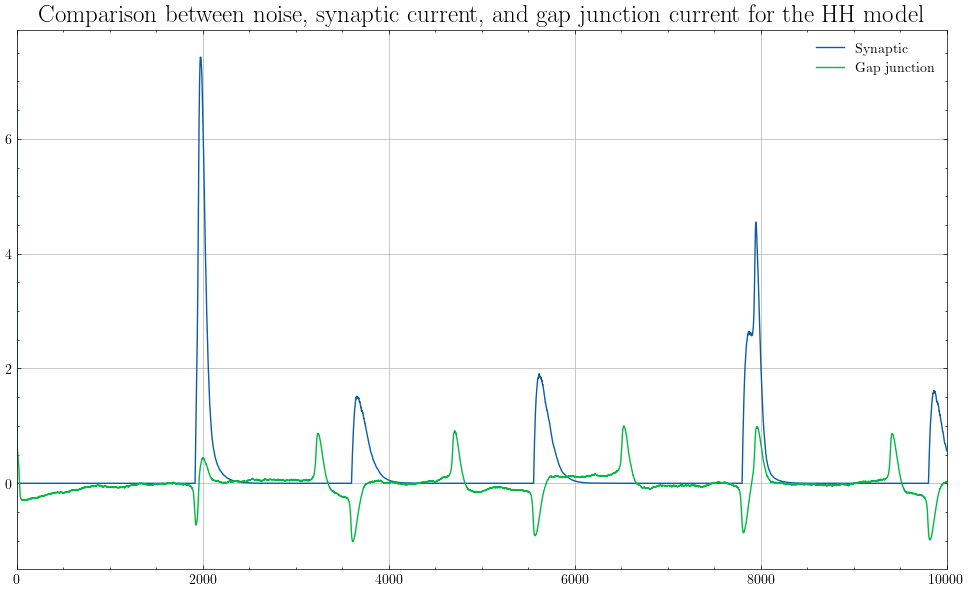

In [7]:
plt.plot(HH_synaptic_current[:,0], label = 'Synaptic')
plt.plot(HH_gap_junction[:,0], label = 'Gap junction')
#plt.plot(I_HH[:,0], 'r-' ,label = 'Noise')
plt.legend()
plt.title('Comparison between noise, synaptic current, and gap junction current for the HH model')
plt.xlim(0,10000)

(0.0, 10000.0)

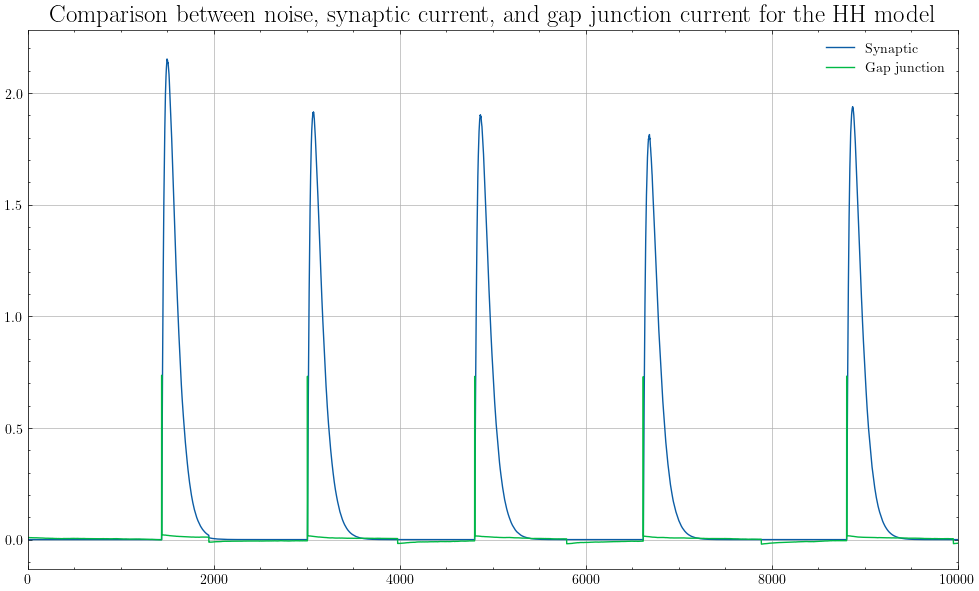

In [8]:
plt.plot(IF_synaptic_current[:,0], label = 'Synaptic')
plt.plot(IF_gap_junction[:,0], label = 'Gap junction')
#plt.plot(I_HH[:,0], 'r-' ,label = 'Noise')
plt.legend()
plt.title('Comparison between noise, synaptic current, and gap junction current for the HH model')
plt.xlim(0,10000)

(0.0, 10000.0)

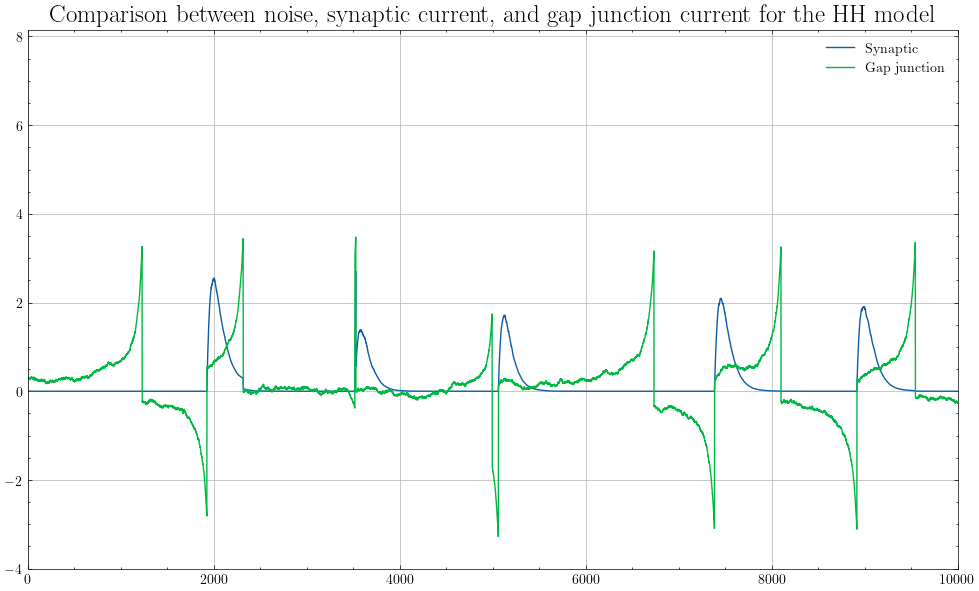

In [9]:
plt.plot(IZH_synaptic_current[:,0], label = 'Synaptic')
plt.plot(IZH_gap_junction[:,0], label = 'Gap junction')
#plt.plot(I_HH[:,0], 'r-' ,label = 'Noise')
plt.legend()
plt.title('Comparison between noise, synaptic current, and gap junction current for the HH model')
plt.xlim(0,10000)

(0.0, 10000.0)

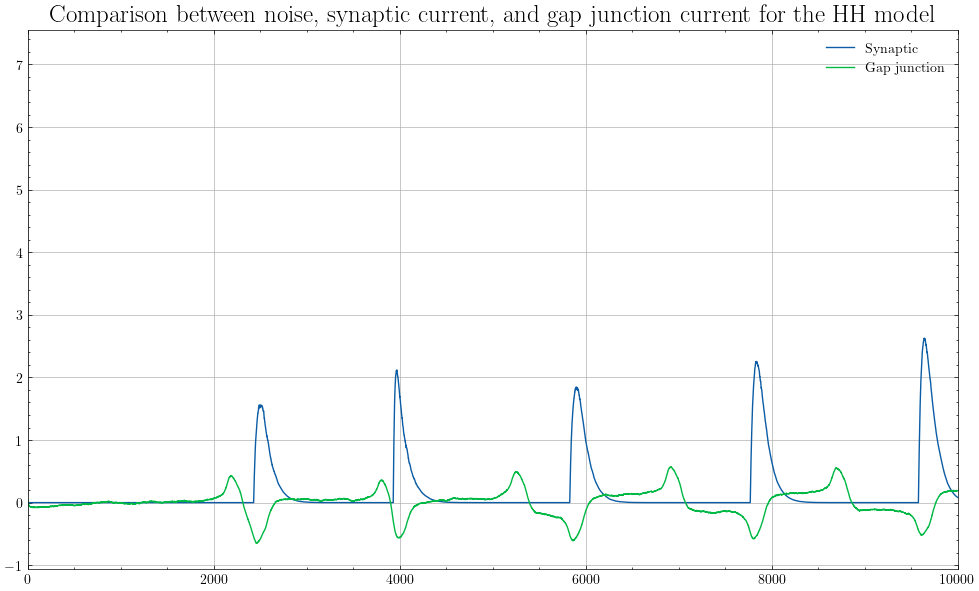

In [10]:
plt.plot(ML_synaptic_current[:,0], label = 'Synaptic')
plt.plot(ML_gap_junction[:,0], label = 'Gap junction')
#plt.plot(I_HH[:,0], 'r-' ,label = 'Noise')
plt.legend()
plt.title('Comparison between noise, synaptic current, and gap junction current for the HH model')
plt.xlim(0,10000)

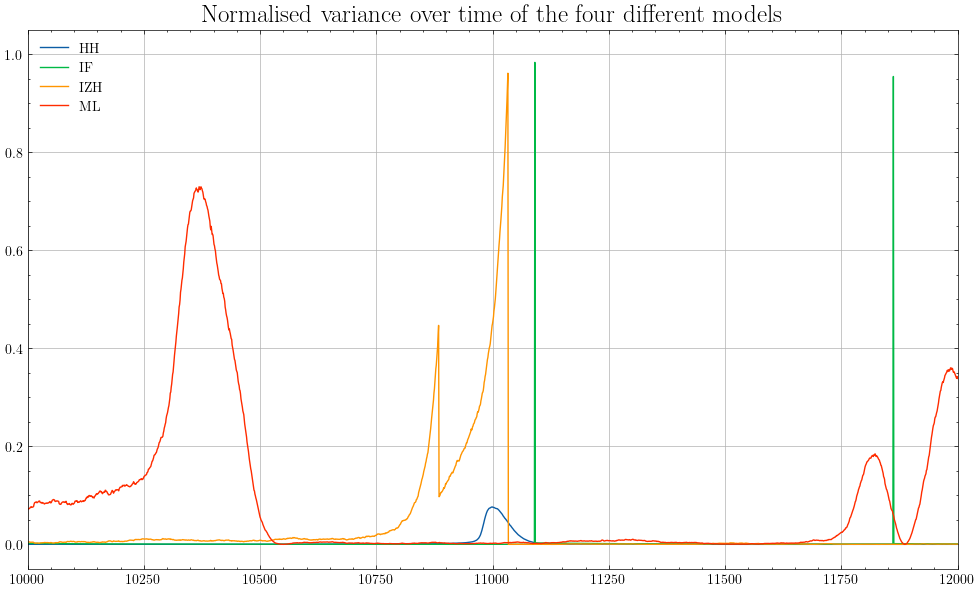

In [11]:
#Compute the variance
var_HH = np.var(HH_gap_junction, axis = 1) / np.max(np.var(HH_gap_junction, axis = 1))
var_IF = np.var(IF_gap_junction, axis = 1) / np.max(np.var(IF_gap_junction, axis = 1))
var_IZH = np.var(IZH_gap_junction, axis = 1) / np.max(np.var(IZH_gap_junction, axis = 1))
var_ML = np.var(ML_gap_junction, axis = 1) / np.max(np.var(ML_gap_junction, axis = 1))


plt.plot(var_HH, label = 'HH')
plt.plot(var_IF, label = 'IF')
plt.plot(var_IZH, label = 'IZH')
plt.plot(var_ML, label = 'ML')
plt.xlim(10000,12000)
plt.title('Normalised variance over time of the four different models')
plt.legend()

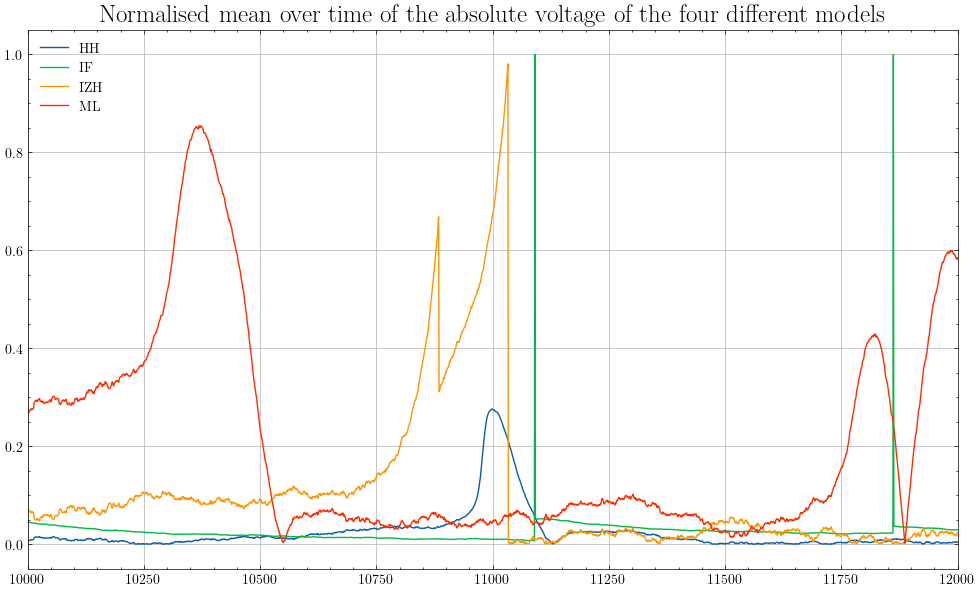

In [12]:
#Compute the absolute mean
mean_HH = np.mean(abs(HH_gap_junction), axis = 1) / np.max(np.mean(abs(HH_gap_junction), axis = 1))
mean_IF = np.mean(abs(IF_gap_junction), axis = 1) / np.max(np.mean(abs(IF_gap_junction), axis = 1))
mean_IZH = np.mean(abs(IZH_gap_junction), axis = 1) / np.max(np.mean(abs(IZH_gap_junction), axis = 1))
mean_ML = np.mean(abs(ML_gap_junction), axis = 1) / np.max(np.mean(abs(ML_gap_junction), axis = 1))


plt.plot(mean_HH, label = 'HH')
plt.plot(mean_IF, label = 'IF')
plt.plot(mean_IZH, label = 'IZH')
plt.plot(mean_ML, label = 'ML')
plt.xlim(10000,12000)
plt.title('Normalised mean over time of the absolute voltage of the four different models')
plt.legend()

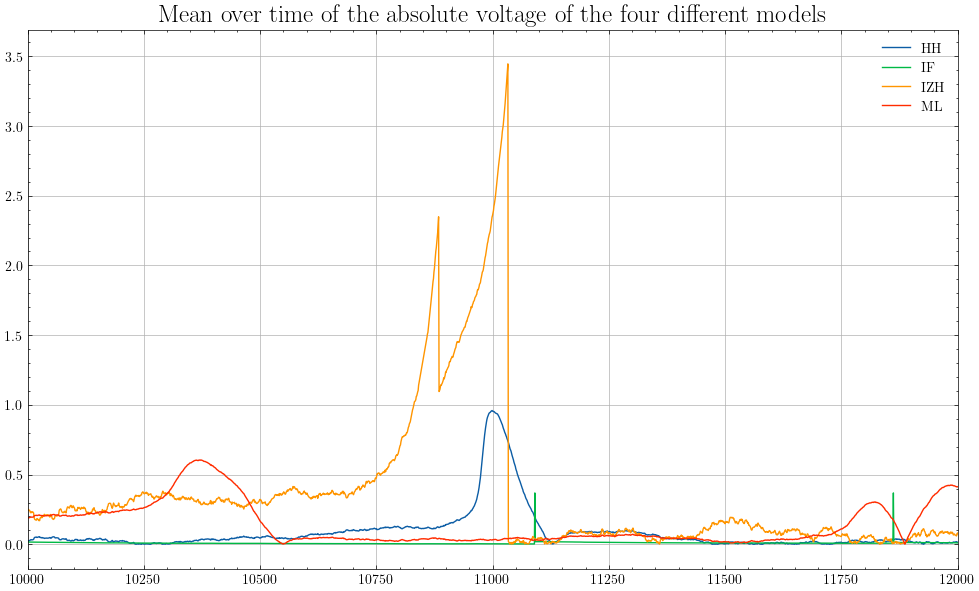

In [13]:
#Compute the absolute mean
mean_HH = np.mean(abs(HH_gap_junction), axis = 1) 
mean_IF = np.mean(abs(IF_gap_junction), axis = 1) 
mean_IZH = np.mean(abs(IZH_gap_junction), axis = 1) 
mean_ML = np.mean(abs(ML_gap_junction), axis = 1)


plt.plot(mean_HH, label = 'HH')
plt.plot(mean_IF, label = 'IF')
plt.plot(mean_IZH, label = 'IZH')
plt.plot(mean_ML, label = 'ML')
plt.xlim(10000,12000)
plt.title('Mean over time of the absolute voltage of the four different models')
plt.legend()